In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


1.	Data Cleaning and Preparation:
●	Load the dataset into a data frame or equivalent data structure.
●	Handle missing values appropriately (e.g., imputation, deletion).
●	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).
●	Detect and treat outliers if necessary.


In [ ]:
#load dataset
df=pd.read_csv('Cardiotocographic.csv')

In [ ]:
df.shape

(2124, 14)

In [ ]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [ ]:
#null values
df.isnull().sum()

,0
LB,21
AC,20
FM,0
UC,0
DL,0
DS,21
DP,21
ASTV,0
MSTV,0
ALTV,0


In [ ]:
#checking duplicates values
df.duplicated().sum()

np.int64(2)

In [ ]:
#drop duplicates values
df.drop_duplicates(inplace=True)

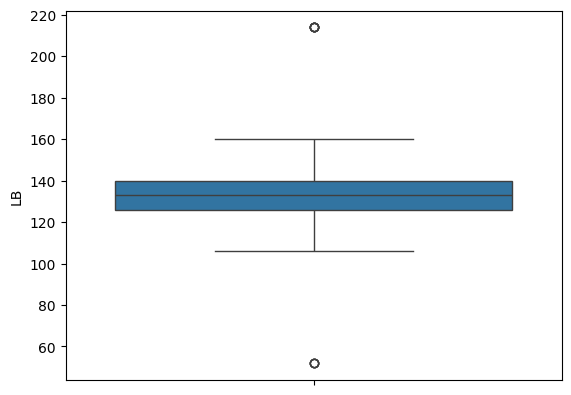

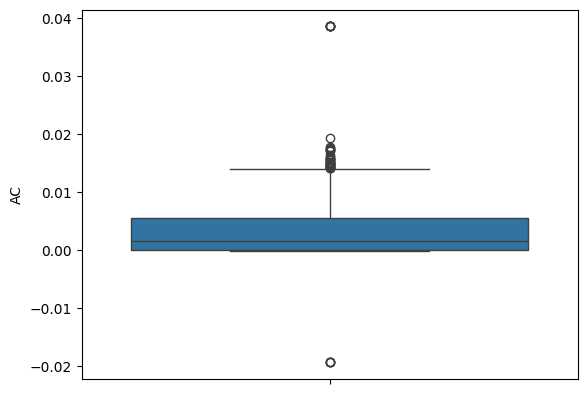

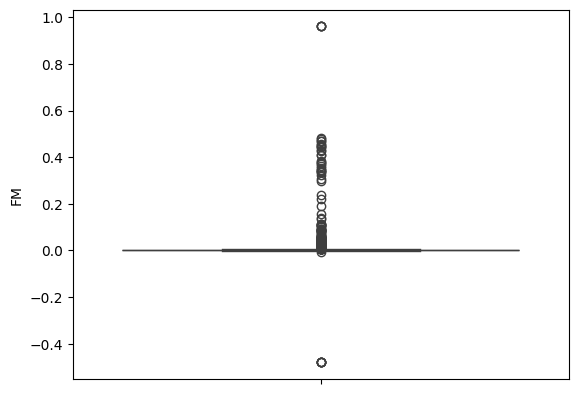

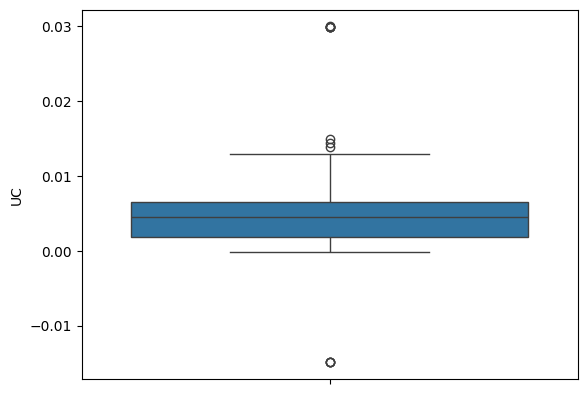

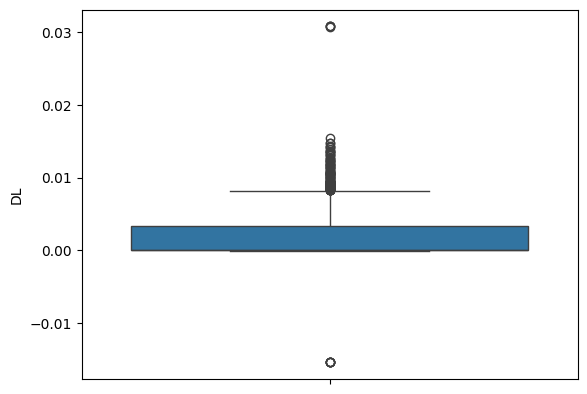

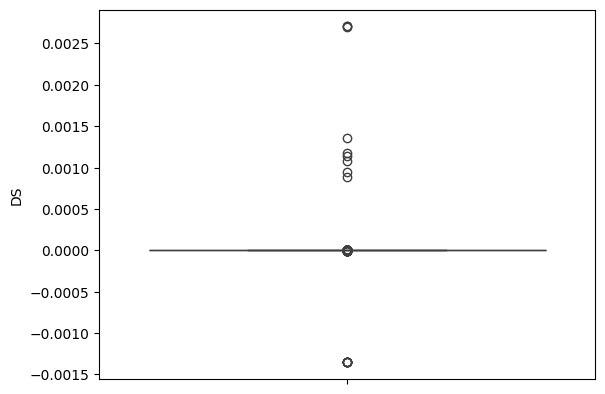

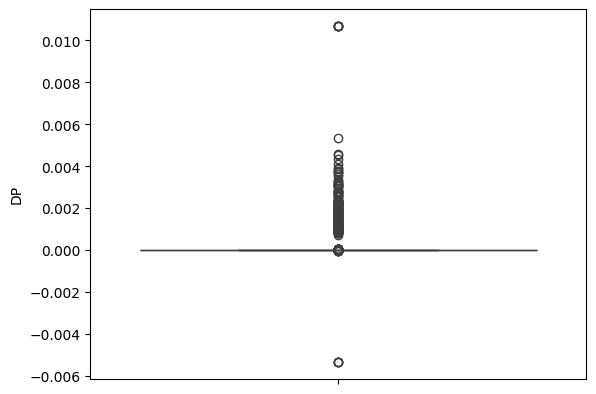

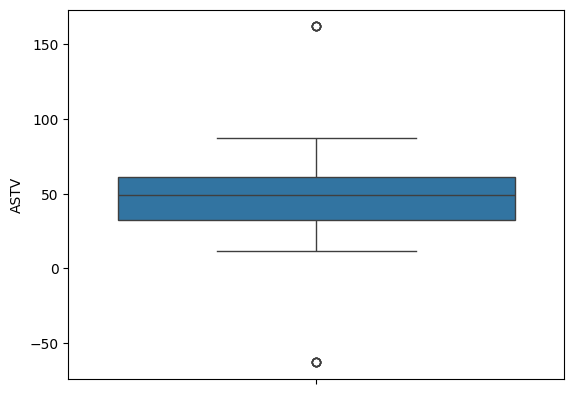

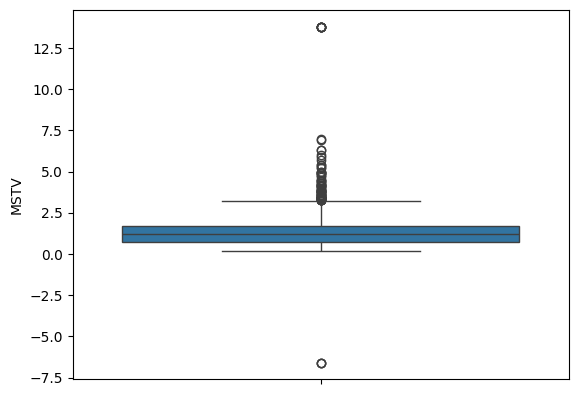

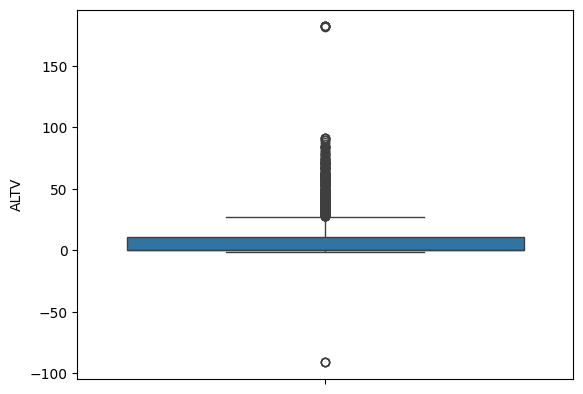

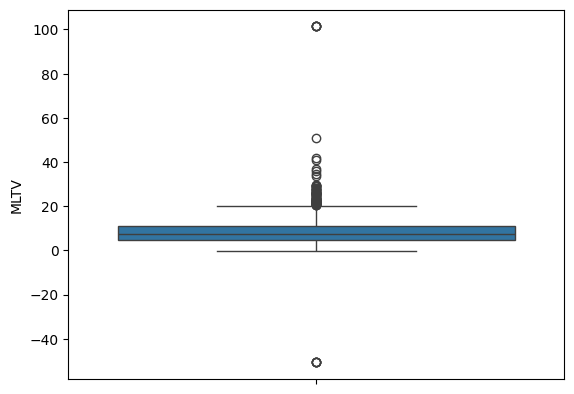

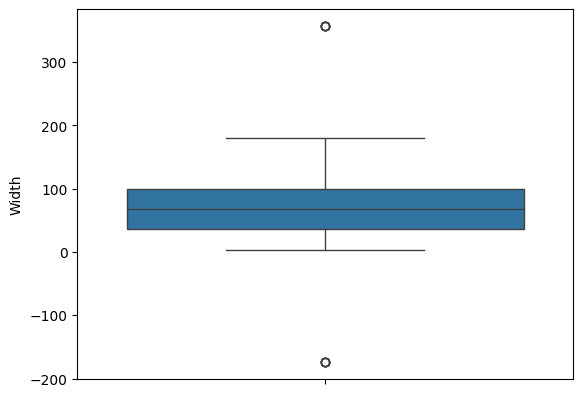

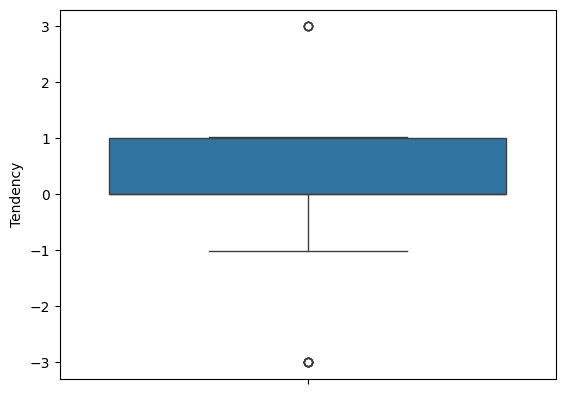

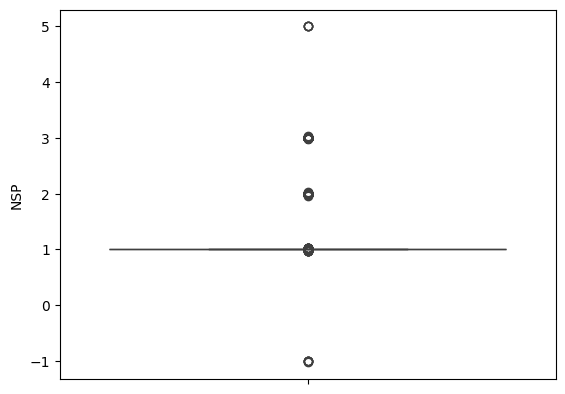

In [ ]:
#handling the missing values by imputation methods
# firstly we should check the outliers for the columns

for col in df.select_dtypes(include='number').columns:
  sns.boxplot(df[col])
  plt.show()


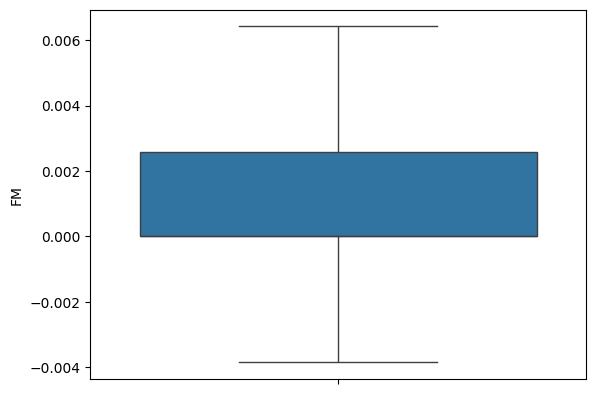

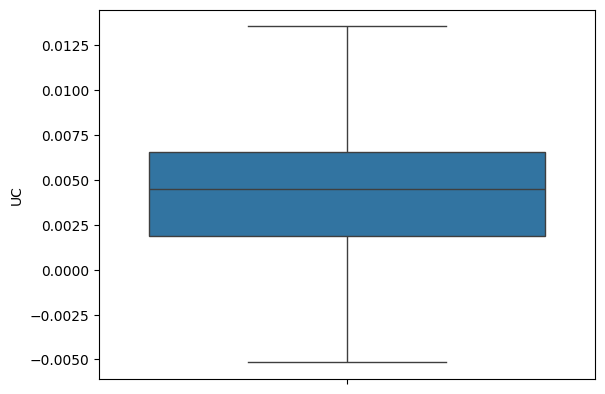

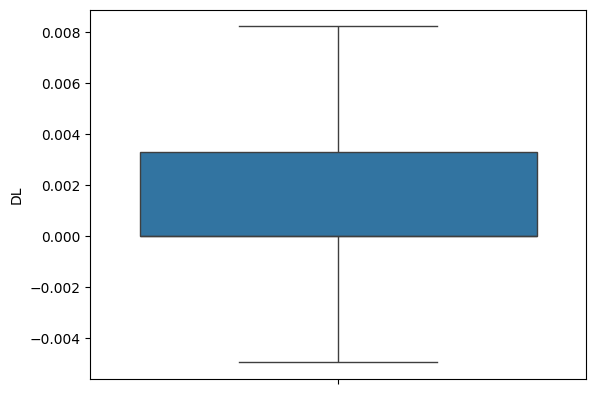

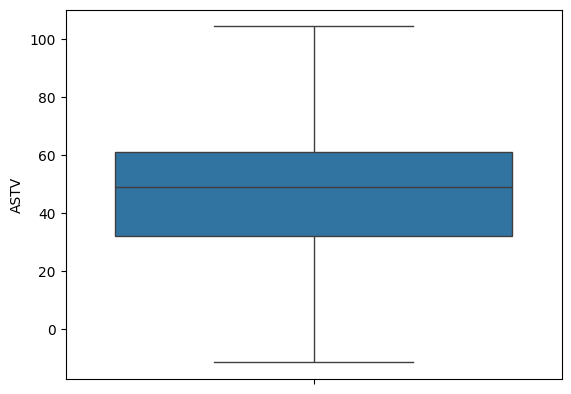

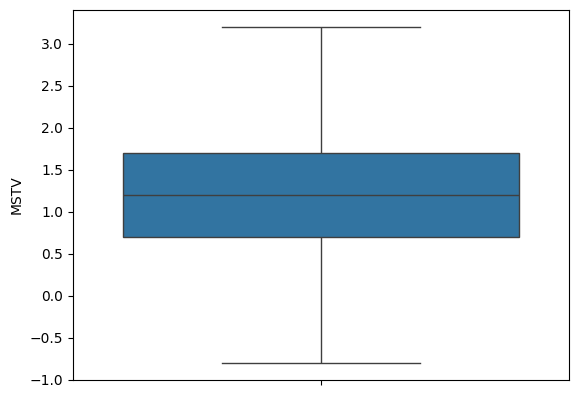

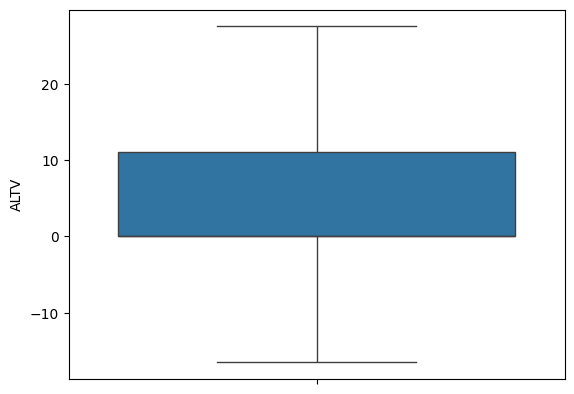

In [ ]:
#lets remove the outliers from the columns
for col in df.select_dtypes(include='number').columns:
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr= q3 - q1
  le= q1-(1.5*iqr)
  ue= q3+(1.5*iqr)
  df.loc[df[col]>ue, col]=ue
  df.loc[df[col]<le, col]=le
  sns.boxplot(df[col])
  plt.show()

In [ ]:
#filling the values by fill na throw median
for col in df.select_dtypes(include='number').columns:
    df[col].fillna(df[col].median,inplace=True)


/tmp/ipython-input-3833570746.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.median of 0       120.000000
1       132.000000
2       133.000000
3       134.000000
4       131.948232
           ...    
2121    140.000000
2122    140.000000
2123    140.000000
2124    140.000000
2125    142.000000
Name: LB, Length: 2124, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[col].fillna(df[col].median,inplace=True)
/tmp/ipython-input-3833570746.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.median of 0       0.000000
1       0.006380
2       0.003322
3       0.002561
4       0.006515
          ...   
2121    0.000000
2122    0.000775
2123    0.000980
2124    0.000679
2125    0.001616
Name: AC, Length: 2124, dtype: float

In [ ]:
df.isnull().sum()

,0
LB,0
AC,0
FM,0
UC,0
DL,0
DS,0
DP,0
ASTV,0
MSTV,0
ALTV,0


●	Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).
●	Highlight any interesting findings from this summary.



In [ ]:
for col in df.select_dtypes(include='number').columns:
  mean=df[col].mean()
  median=df[col].median()
  std=df[col].std
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr= q3 - q1

  print("Mean :",mean)
  print("Median :",median)
  print("Standard deviation :",std)
  print("Interquartile Range :",iqr)
  print("-"*40)

Mean : 0.0015700097762862035
Median : 0.0
Standard deviation : <bound method Series.std of 0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
2121    0.006421
2122    0.000000
2123    0.000000
2124    0.000000
2125   -0.000188
Name: FM, Length: 2124, dtype: float64>
Interquartile Range : 0.00256842175
----------------------------------------
Mean : 0.00436470300972252
Median : 0.0044863175
Standard deviation : <bound method Series.std of 0       0.000000
1       0.006380
2       0.008306
3       0.007742
4       0.008143
          ...   
2121    0.007426
2122    0.006979
2123    0.006863
2124    0.006110
2125    0.008078
Name: UC, Length: 2124, dtype: float64>
Interquartile Range : 0.00467761975
----------------------------------------
Mean : 0.0017724816850668696
Median : 0.0
Standard deviation : <bound method Series.std of 0       0.000000
1       0.003190
2       0.003322
3       0.002561
4       0.000000
          ...   
2121    0.

3.	Data Visualization:
●	Create histograms or boxplots to visualize the distributions of various numerical variables.
●	Use bar charts or pie charts to display the frequency of categories for categorical variables.
●	Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.
●	Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.




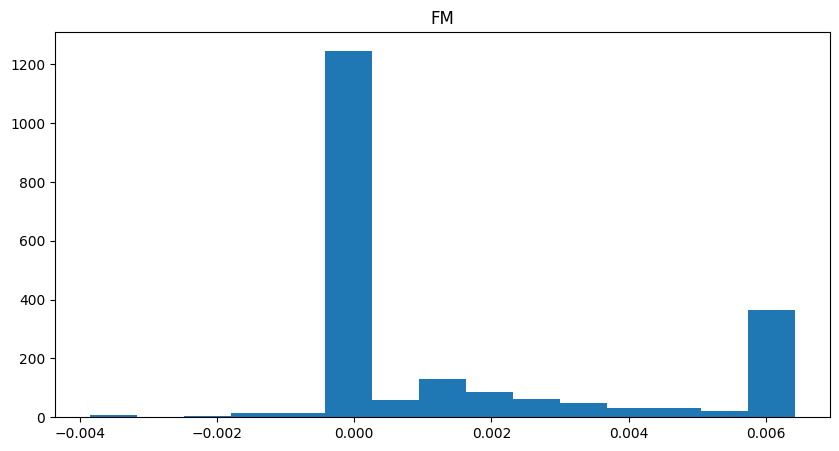

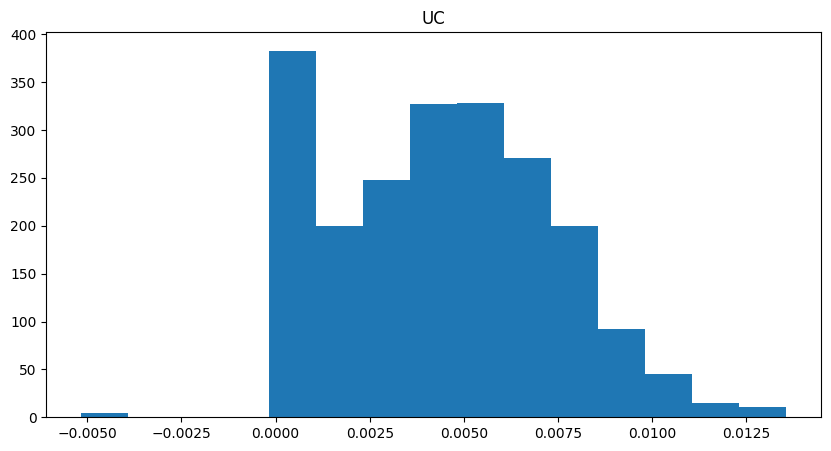

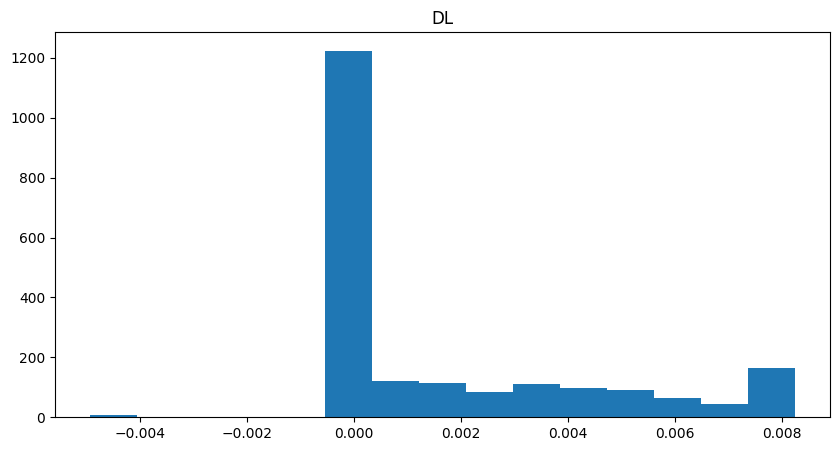

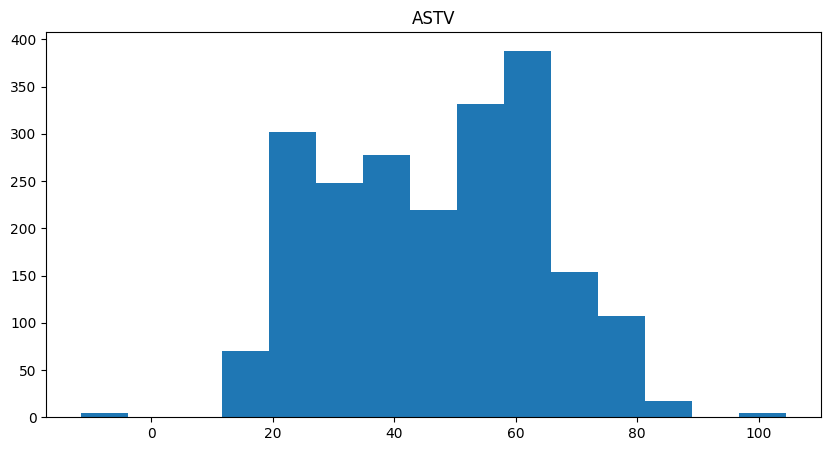

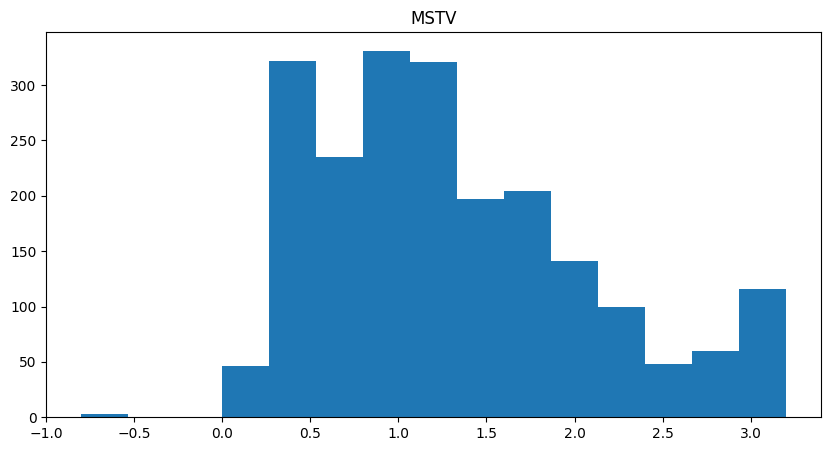

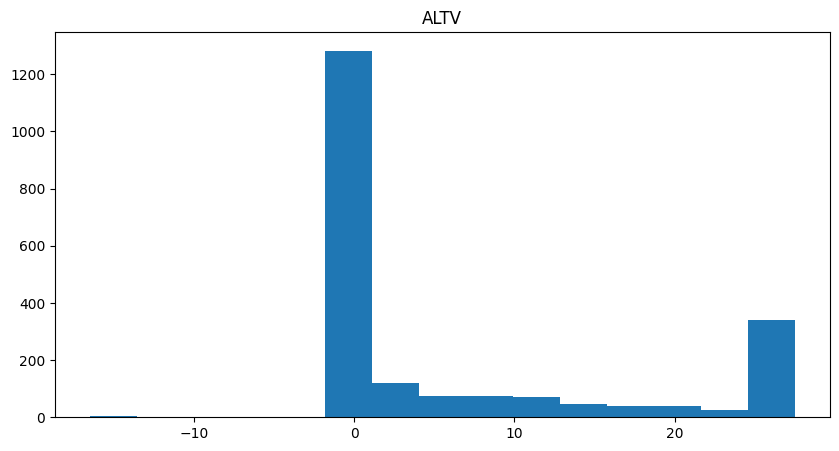

In [ ]:
for col in df.select_dtypes(include='number').columns:
  plt.figure(figsize=(10,5))
  plt.hist(df[col],bins=15)
  plt.title(col)
  plt.show()


In [ ]:
cat_col = df.select_dtypes(include=['object','category']).columns
cat_col

Index(['LB', 'AC', 'DS', 'DP', 'MLTV', 'Width', 'Tendency', 'NSP'], dtype='object')

In [ ]:
df[cat_col].nunique()

,0
LB,152
AC,1039
DS,2
DP,2
MLTV,297
Width,262
Tendency,111
NSP,2


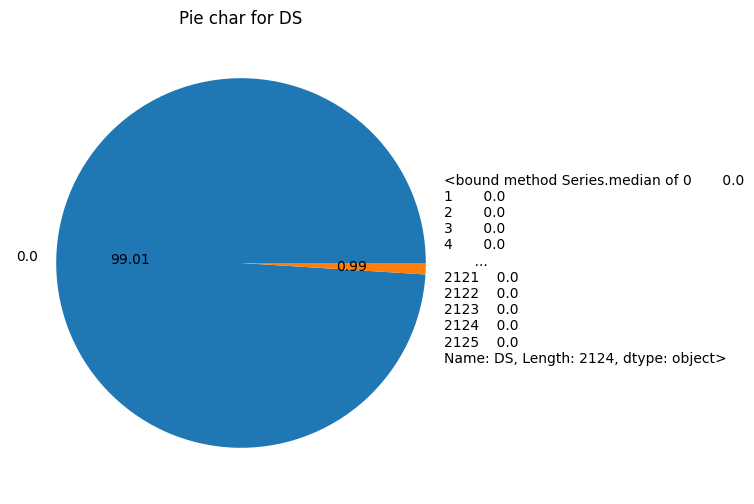

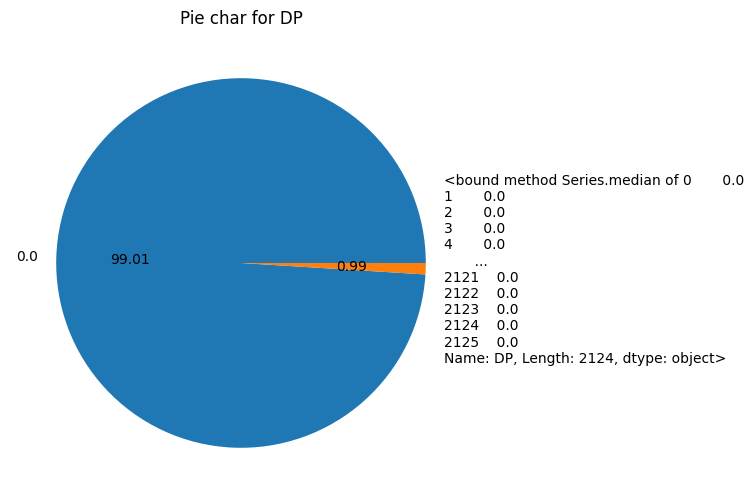

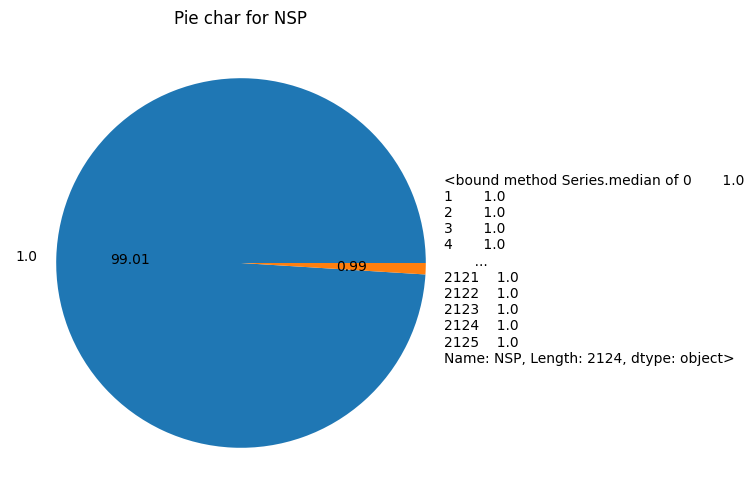

In [ ]:
for col in cat_col:
  if df[col].nunique()<10:
    plt.figure(figsize=(6,6))
    plt.pie(df[col].value_counts(),labels=df[col].value_counts().index,autopct='%0.2f')
    plt.title(f"Pie char for {col}")
    plt.show()

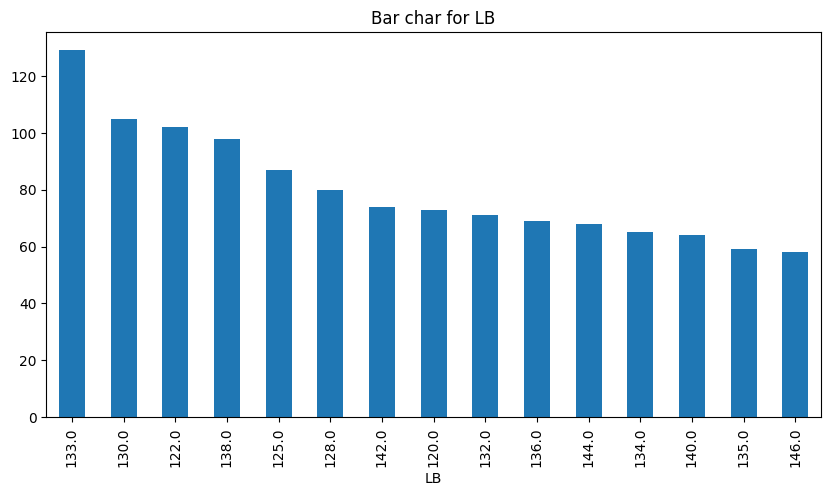

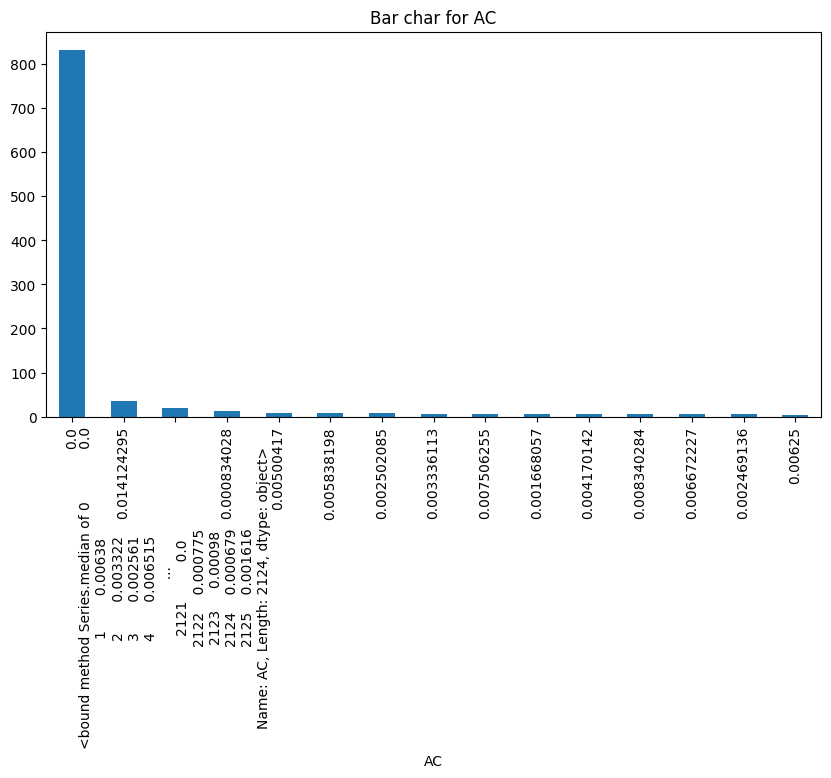

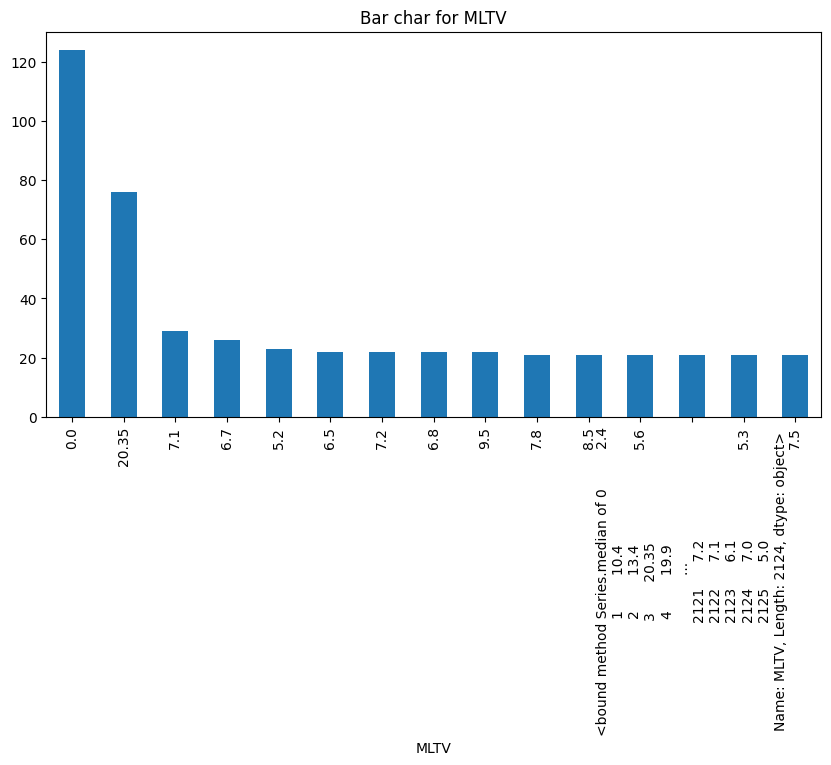

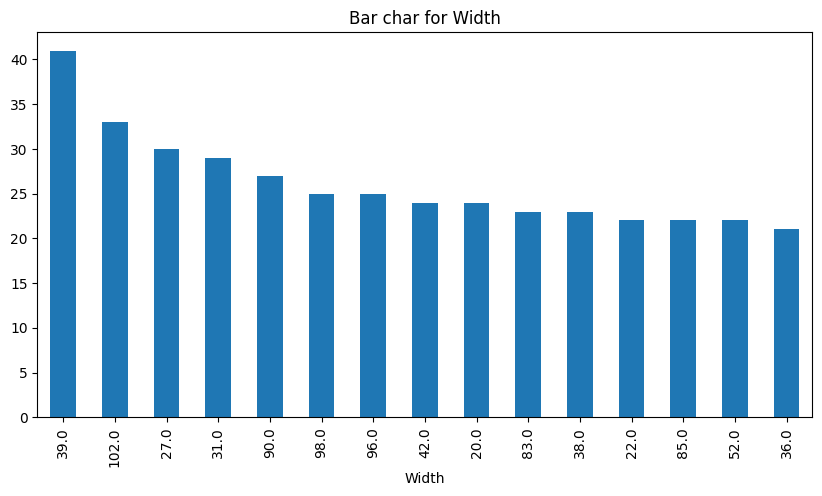

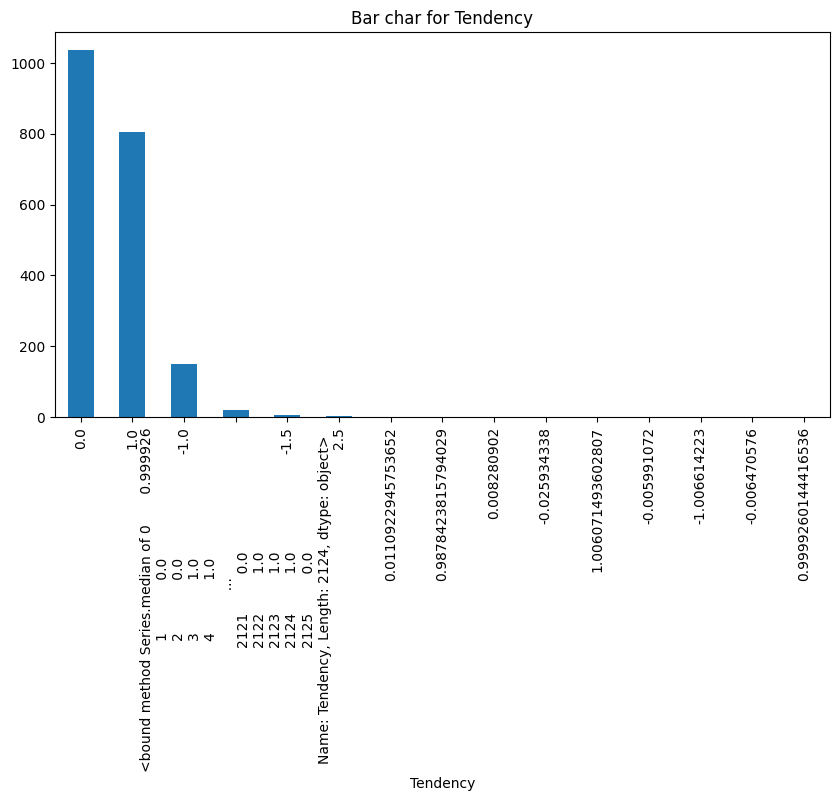

In [ ]:
for col in cat_col:
  if df[col].nunique()>10:
    plt.figure(figsize=(10,5))
    df[col].value_counts().head(15).plot(kind='bar')
    plt.title(f"Bar char for {col}")
    plt.show()

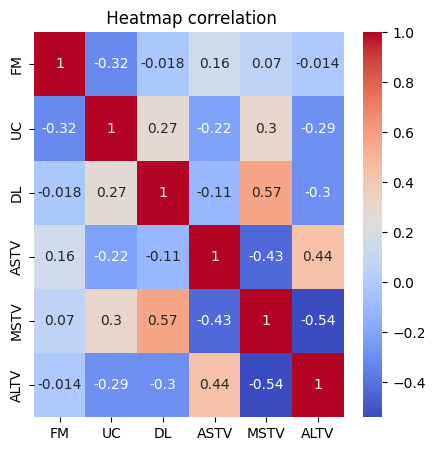

In [ ]:
  plt.figure(figsize=(5,5))
  sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,cmap='coolwarm')
  plt.title(f" Heatmap correlation")
  plt.show()

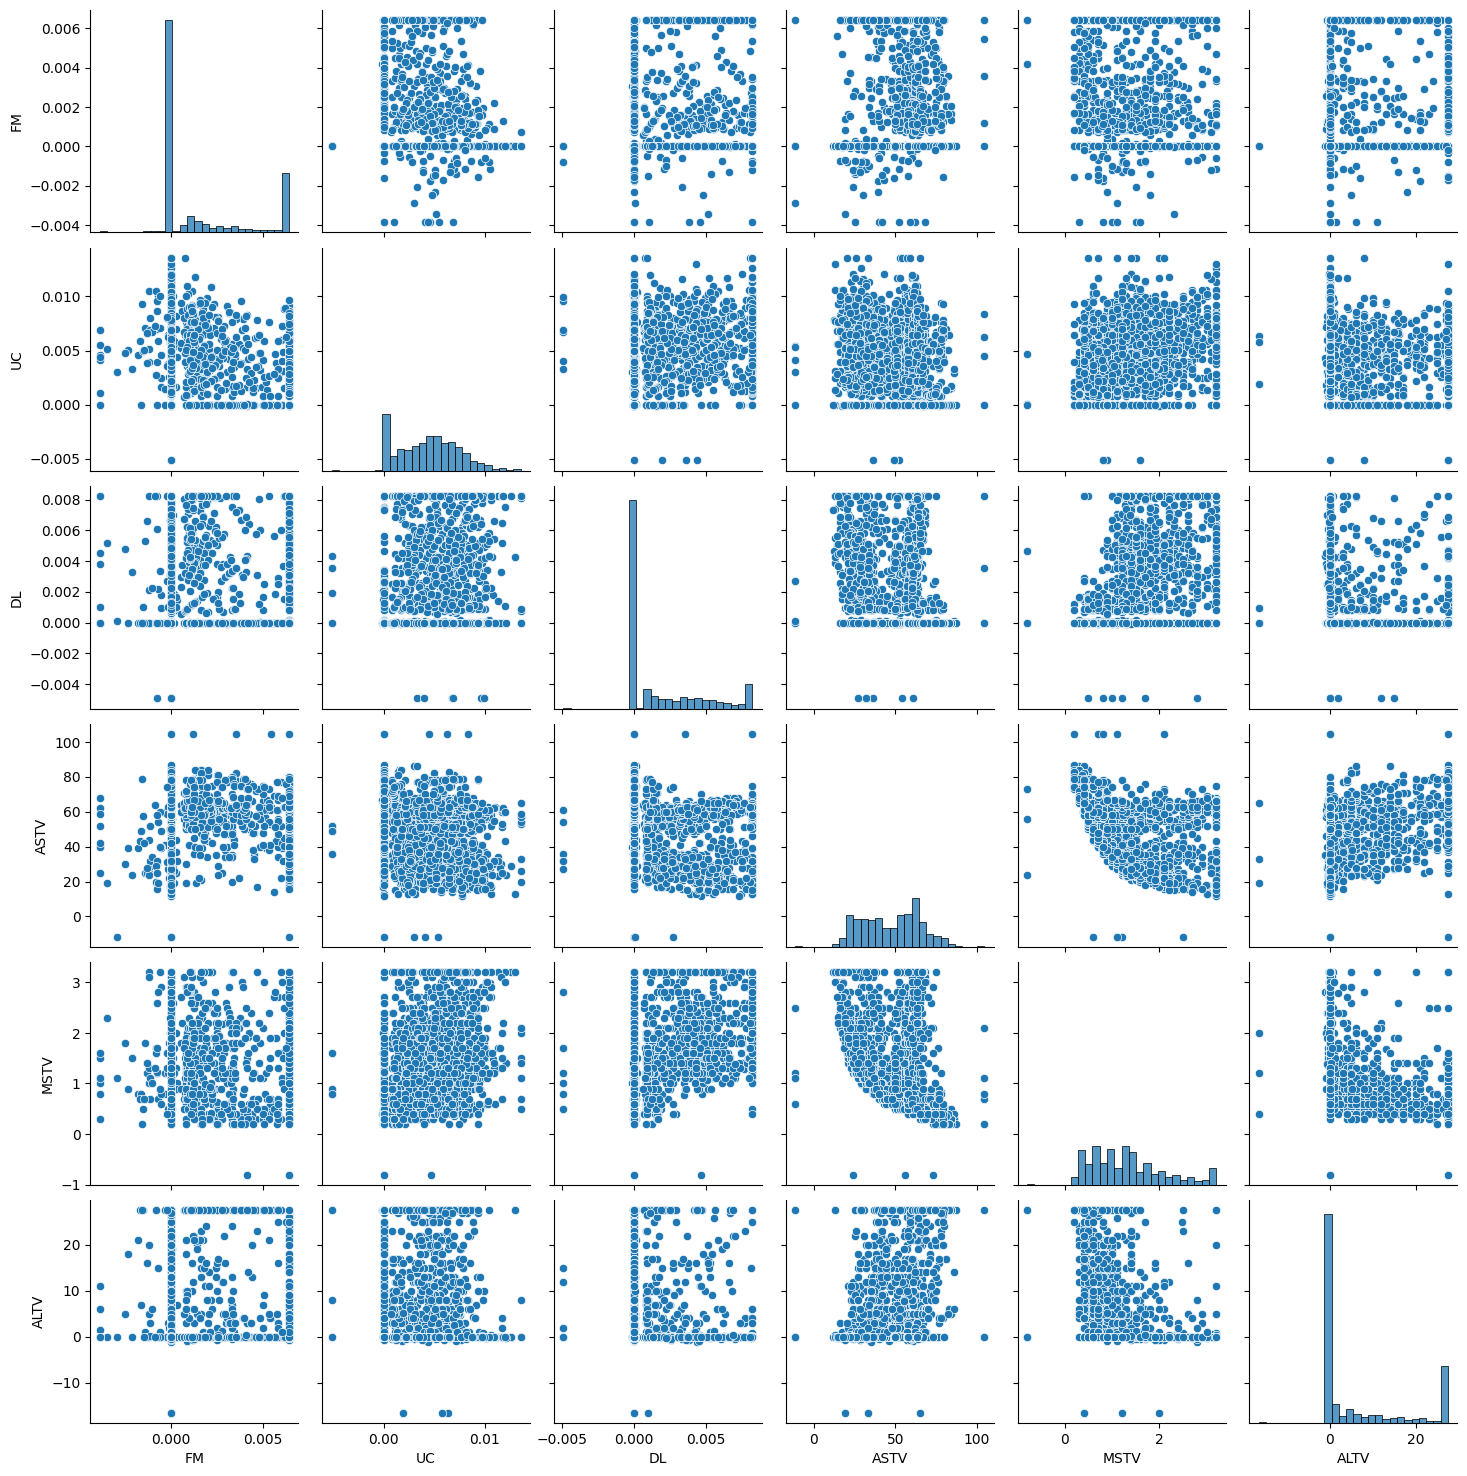

In [ ]:
sns.pairplot(df.select_dtypes(include='number'))
plt.show()

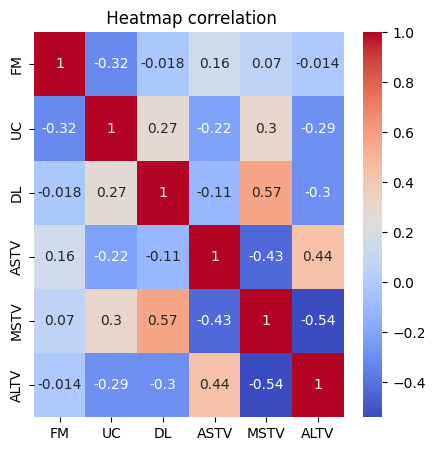

In [ ]:
  plt.figure(figsize=(5,5))
  sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,cmap='coolwarm')
  plt.title(f" Heatmap correlation")
  plt.show()

4.	Pattern Recognition and Insights:
●	Identify any correlations between variables and discuss their potential implications.
●	Look for trends or patterns over time if temporal data is available



From Heat map we can see the correlations between two variables.
from the above heatmap lets discuss the patterns and there correlations

1.FM vs ASTV has slightly weak positive correaltion which is 0.16
2.FM vs UC has negative correlation of -0.32

3.UC has positive correlation with DL and MSTV
4.UC has neagtive correlation with ASTV,ALTV and FM

5.DL has moderate correlation with MSTV of 0.57
6.Dl has slightly negative correlation between ASTV

7.ASTV has moderate positive correlation with ALTV
8.ASTV hasb= negative corelation with MSTV,FM,UC and DL

9.MSTV has moderate positive correlation with UC and DL
10.MSTV has higly negative correlation between ASTV and ALTV

11.ALTV has positive correlation with ASTV of 0.44
12.ALTV has negative correlation with MSTV,FM,DL and UC



In the above dataset we dont have any temporal data so there is no patterns and trends in the dataset

5.	Conclusion:
●	Summarize the key insights and patterns discovered through your exploratory analysis.
●	Discuss how these findings could impact decision-making or further analyses.



Conclusion :
In the dataset of Cardiotocographic there are 2124 rows and 14 columns, in this it consits of missing values and duplicated rows
Firstly i have cleaned all the data by deleting duplicate columns and by filling the null values with different imputation techniques.
As we know when we fill null values we check wheather the column contains the outliers or not. if outliers exist we fill the null values with median. if there is not outliers then we fill with mean.
As every column in the dataset has outliers so i have detected outliers and removed by using Inter qunatile range method by calculating the q1 and q3. And then i have filled the null values with there mean.

2.I have calculated the mean,median,standard deviation and inter qunatile range. and i provided a stastical summary for numerical data

3.We have done different visualizations by using barchart,histogram,piechart,pairplot and heatmap
I have used histogram for numerical data, and i used pie chart and bar chart for catgory data.the dataset has huge number of rows i did unique in the columns then i take the first 15 rows to visulaize the barchart. as whose unique is lessthan 10 i used piechart to show.
and did a heatmap and pairplot which gives deeper insights about the columns.

In this way i have completed the give tasks by using appopriate methods.